<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Modelos no lineales para pronósticos. 

**Nombres:** José de Jesús Carbajal Castellanos

**Fecha:** 9 de marzo del 2025.

**Expediente** : XXX.
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: Link con el enlace del repositorio del creador del proyecto

# Tarea X: Clase X

# <font color= red>  Tarea  </font>

Implementar todas las técnicas vistas en esta clase al siguiente dataset para predecir el precio de las viviendas:

https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


In [16]:
#Lectura, procesado y separación de los datos
df = pd.read_csv('data/Housing.csv')

X = df.drop(columns=['price'])
y = df['price']


categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].mean())

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])
X_processed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [17]:
#Reshape y definición de la red
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Dfine arch
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # ooutput layer for regression
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/home/pepechuy/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
#Ejecución y evaluación
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))
y_pred = model.predict(X_test).flatten()
r2 = r2_score(y_test, y_pred)

print(f'R² Score: {r2:.4f}')

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 25066362372096.0000 - mae: 4692321.0000 - val_loss: 30129828921344.0000 - val_mae: 5007520.5000
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24598382903296.0000 - mae: 4647642.0000 - val_loss: 30128725819392.0000 - val_mae: 5007413.0000
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25900229853184.0000 - mae: 4791374.5000 - val_loss: 30123610865664.0000 - val_mae: 5006919.5000
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25048284921856.0000 - mae: 4701130.5000 - val_loss: 30107164999680.0000 - val_mae: 5005343.0000
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25306010222592.0000 - mae: 4703740.5000 - val_loss: 30065882562560.0000 - val_mae: 5001395.0000
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26238926192640.0000 - mae: 4829310.5000 - val_loss: 29981142941696.0000 - val_mae: 4993293.5000
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25335200481280.00

# 

# 

# 

# 

### Investigación de aplicación de una CNN

Para esta actividad seleccionamos el filtro deconvolucional Grad-Cam ya que nos interesa conocer cómo es que las CNN aprenden internamente y en qué features de las imágenes se concentra su atención.   

Este filtro se basa en los gradientes de cada clase con respecto a los mapas de activacción de una capa convolucional específica, se pondneran los gradientes y obtenemos de output un mapa de calor que resalta los pixeles más importantes para la predicción de la clase.    

Grad cam consta de 5 pasos importantes:
1. **Forward propagation (inherente a la red)**
    - Se introduce la imagen y se genera la clase predicha
    - se extraen los mapas de features de una capa específica

2. **Cálculo de los gradientes**
    - Se calcila el gradiente de la probabilidad de la clase objetivo respecto a cada mapa de features
    - esto dará de output que tan sensible es la salida de la red a cambios en el mapa

3. **Cálculo de los Pesos de importancia**
    - Se realiza un promedio espacial de los gradientes sobre la dimensión espacial (i, j) para obtener un peso de importancia para cada filtro de capa

4. **Construcción del Mapa de Calor**
    - Se obtiene el mapa de activación ponderado sumando los mapas de características multiplicados por sus pesos de importancia.
    - Se usa ReLU para eliminar valores negativos, ya que solo nos interesan los features que aportan positivamente a la predicción de la clase

5. **Superposición en la imagen original**
    - Se normaliza el heatmap entre 0 y 1
    - Se redimensiona al tamaño del input
    - se sobreponen las imagenes con una escala de colores



![CBAM Example](https://glassboxmedicine.com/wp-content/uploads/2020/05/example-cbam.png)


![CBAM Example](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSurFfWsEgrboQid-AzdAFDMUQgND28XR8Vhg&s)

En alguna ocasión desarrollé un algoritmo similar (guided backpropagation) para mi clase de Machine Learning, en una de las primeras capas, lo que hizo que los featues que se mostraban eran usualmente sobre la forma del objeto, mostrando que la red en esa capa aprendía en base al contorno o figura de la clase

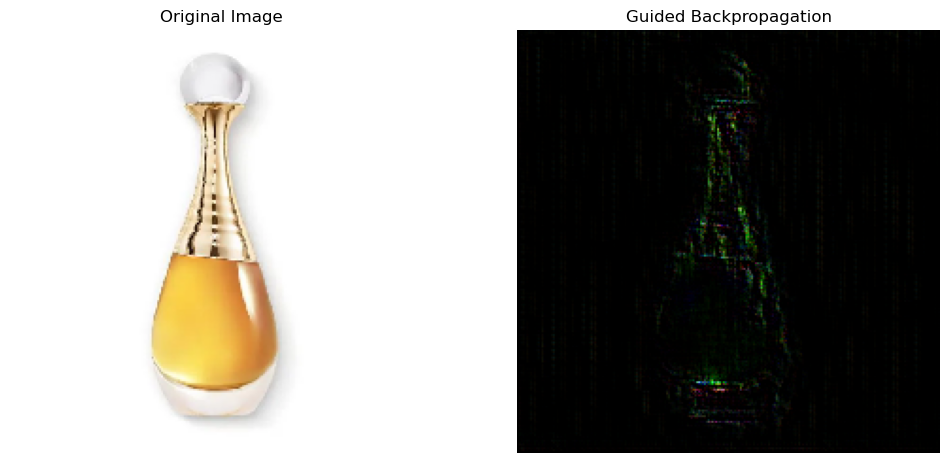

Fuente:
Selvaraju, R. R., Cogswell, M., Das, A., Vedantam, R., Parikh, D., & Batra, D. (2019). Grad-CAM: Visual Explanations from Deep Networks via Gradient-Based Localization. International Journal of Computer Vision, 128(2), 336–359. https://doi.org/10.1007/s11263-019-01228-7